# Clustering of Credit Cards

Bu projede kredi kartı kullanıcıları, bakiye, kart limiti ve harcama tutarı açısından kümelenmeye çalışılmıştır.

<br>Projede kullanılan veriler <a href="https://thecleverprogrammer.com/2022/10/03/credit-card-clustering-with-machine-learning/" target="_blank">
buradan</a> temin edilmiştir.

<br>
<img src="https://imgrosetta.mynet.com.tr/file/13964089/13964089-728xauto.jpg" width="300px">

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

### Keşfedici Veri Analizi (EDA)

In [2]:
df=pd.read_csv("CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Boş verileri doldurmak yerine veri setinden çıkaralım
df = df.dropna()

### Modelleme

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Kredi kartı kümelemede diğerlerine kıyasla çok daha önemli olması nedeniyle aşağıdaki alanlar kullanılacaktır:
* BALANCE: Bakiye
* PURCHASES: Harcama tutarı
* CREDIT_LIMIT: Kredi kartı limiti

In [7]:
dfc=df[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]

In [8]:
scaler = MinMaxScaler()
dfc = pd.DataFrame(scaler.fit_transform(dfc), columns=dfc.columns)

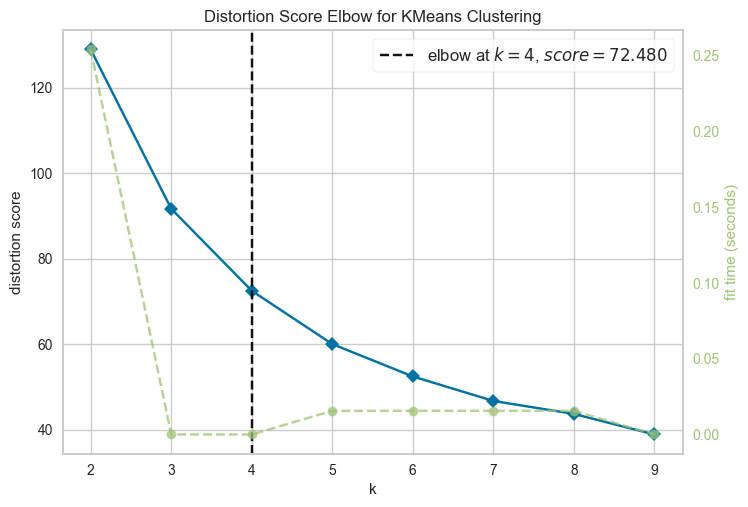

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
km=KMeans()
vis=KElbowVisualizer(km, k=(2,10))
vis.fit(dfc)
vis.show()

In [10]:
model=KMeans(n_clusters=4)
model=model.fit(dfc)

In [11]:
pred=model.predict(dfc)

In [12]:
dfc["Cluster"]=pred

In [13]:
dfc.sample(5)

,BALANCE,PURCHASES,CREDIT_LIMIT,Cluster
1476,0.119226,0.168380,0.432387,1
2392,0.291453,0.020927,0.365609,3
2253,0.010772,0.042131,0.248748,2
6,0.095764,0.008895,0.075125,0
6214,0.018192,0.070619,0.165275,2


<Axes: xlabel='Cluster', ylabel='count'>

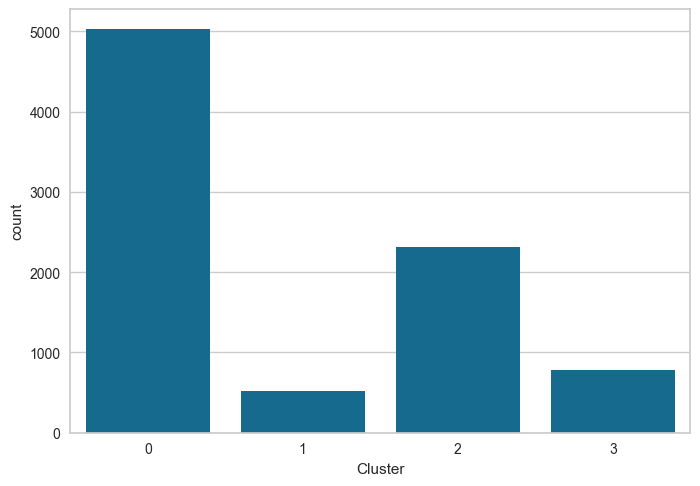

In [14]:
sns.countplot(x=dfc["Cluster"])

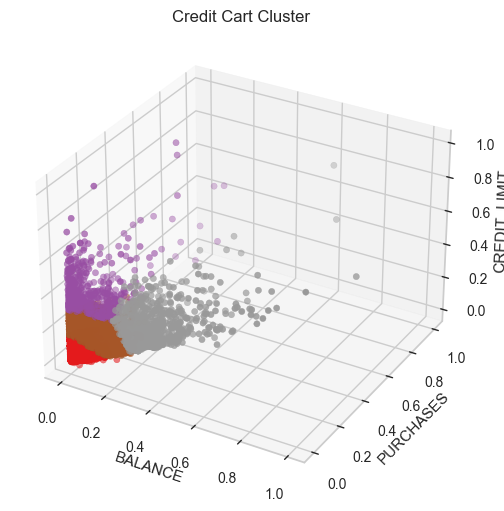

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(dfc['BALANCE'], dfc['PURCHASES'], dfc['CREDIT_LIMIT'], c=dfc['Cluster'], cmap='Set1')

# Eksen etiketlerini ayarlama
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CREDIT_LIMIT')

# Başlığı ve grafiği gösterme
plt.title('Credit Cart Cluster')
plt.show()

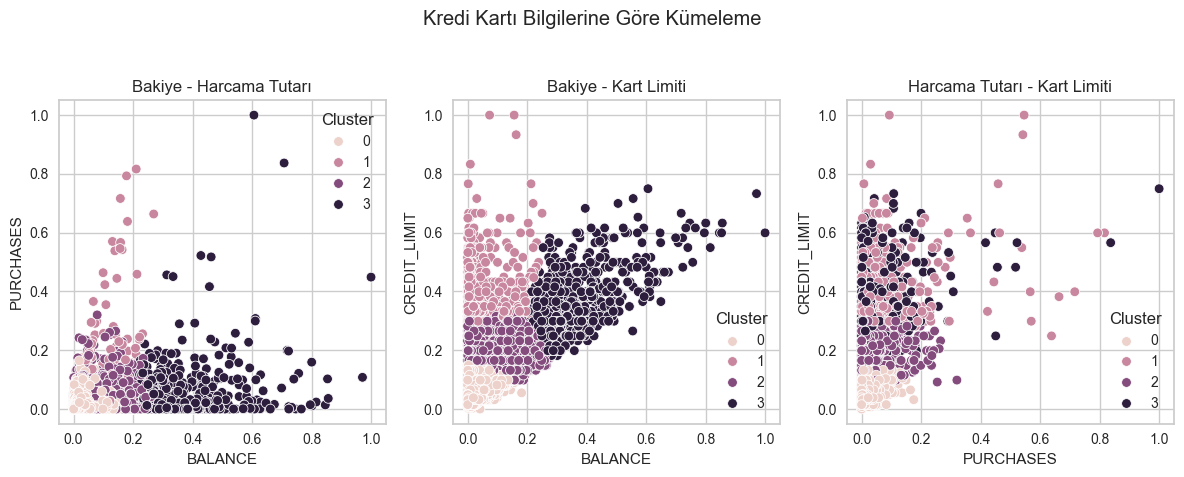

In [16]:
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle('Kredi Kartı Bilgilerine Göre Kümeleme')

sns.scatterplot(ax=axes[0], x=dfc['BALANCE'], y=dfc['PURCHASES'], hue=dfc['Cluster'], color='skyblue');
axes[0].set_title('Bakiye - Harcama Tutarı')

sns.scatterplot(ax=axes[1], x=dfc['BALANCE'], y=dfc['CREDIT_LIMIT'], hue=dfc['Cluster'], color='orange');
axes[1].set_title('Bakiye - Kart Limiti')

sns.scatterplot(ax=axes[2], x=dfc['PURCHASES'], y=dfc['CREDIT_LIMIT'], hue=dfc['Cluster'], color='green');
axes[2].set_title('Harcama Tutarı - Kart Limiti')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [17]:
dfc.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,Cluster
count,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.084084,0.020910,0.149319,0.866142
std,0.110043,0.044191,0.122178,1.091806
min,0.000000,0.000000,0.000000,0.000000
25%,0.007777,0.000884,0.051753,0.000000
50%,0.048146,0.007655,0.098497,0.000000
75%,0.110549,0.023368,0.215359,2.000000
max,1.000000,1.000000,1.000000,3.000000


In [18]:
# Her bir kümenin ortalama değerleri
cluster_means = dfc.groupby('Cluster').mean()
cluster_means

,BALANCE,PURCHASES,CREDIT_LIMIT
Cluster,,,
0,0.040251,0.011299,0.068239
1,0.063261,0.065283,0.408284
2,0.090954,0.026430,0.203367
3,0.361307,0.037170,0.340807


In [20]:
df_sonuc=pd.DataFrame({
    "Küme":[0,1,2,3],
    "Bakiye":["Düşük", "Orta", "Yüksek", "Düşük"],
    "Harcama Tutarı":["Orta", "Orta", "Yüksek", "Düşük"],
    "Kart Limiti": ["Orta", "Orta", "Yüksek", "Düşük"]
})
df_sonuc

,Küme,Bakiye,Harcama Tutarı,Kart Limiti
0,0,Düşük,Orta,Orta
1,1,Orta,Orta,Orta
2,2,Yüksek,Yüksek,Yüksek
3,3,Düşük,Düşük,Düşük


### Sonuç:
* Küme-0: Bakiyesi düşük, harcama ve kart limiti açısından orta seviye
* Küme-1: Her özelliği orta seviye
* Küme-2: Her özelliği yüksek seviye
* Küme-3: Her özelliği düşük seviye

Yukarıdaki bilgiler göz önüne alındığında 4 farklı kredi kartı kullanıcı tipi olduğu görülmektedir. O. küme hariç diğerleri düşük, orta ve yüksek olarak sınıflandırılmaktadır. 0. küme ise bakiye açısından düşük diğerleri orta seviye olan kullanıcıları temsil etmektedir.